# 모듈 임포트

In [3]:
import pandas as pd
import numpy as np
import os

# 파일 업로드

In [110]:
data = pd.read_csv('/content/train.csv')

In [11]:
data.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [111]:
# 앞의 행 번호를 나타내는 열을 지워내기
data = data.iloc[:,1:]

In [13]:
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


# 데이터 전처리

## OneHotEncoder 적용

In [15]:
# 원핫인코더를 이용한 범주형 변수 인코딩

from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)

In [19]:
# 범주형 변수를 다루는 열에 대해서 인코딩한 결과
print(ohe.fit_transform(data[['Species', 'Island', 'Clutch Completion', 'Sex']]))
print(ohe.get_feature_names())

[[0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
['x0_Adelie Penguin (Pygoscelis adeliae)'
 'x0_Chinstrap penguin (Pygoscelis antarctica)'
 'x0_Gentoo penguin (Pygoscelis papua)' 'x1_Biscoe' 'x1_Dream'
 'x1_Torgersen' 'x2_No' 'x2_Yes' 'x3_FEMALE' 'x3_MALE' 'x3_nan']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


- 이때 위의 펭귄 성별로 nan 값이 존재하는 데 이를 어떻게 처리할 지가 관건이 될듯 하다!!
- 성별 뿐만 아니라 다른 자료형에서도 NaN 이 종종 존재한다!!

## ColumnTransformer 적용

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 컬럼트랜스포머 & 스탠다드스케일러 이용
# 범주형 변수는 인코딩, 실수형은 스케일 조정

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']),
     ("onehot", OneHotEncoder(sparse=False), ['Species', 'Island', 'Clutch Completion', 'Sex'])])

In [31]:
display(ct)

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['Culmen Length (mm)', 'Culmen Depth (mm)',
                                  'Flipper Length (mm)', 'Delta 15 N (o/oo)',
                                  'Delta 13 C (o/oo)']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['Species', 'Island', 'Clutch Completion',
                                  'Sex'])])

# 결측치 제거

- 데이터에서 NaN값을 제거해보자
    - NaN값이 존재하는 데이터 제거

In [57]:
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [58]:
# 결측치가 존재하는 행이 삭제되어 114행 -> 109행이 된 모습
ndata = data.dropna(axis=0)
display(ndata)

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
108,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.0,19.6,212,MALE,9.34089,-24.45189,4300
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


## k-최근접 이웃 회귀

In [65]:
# 범주형 인코딩&실수형 스탠다드 스케일링 결과 바탕으로 k-최근접 이웃 회귀 적용
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# target인 펭귄 몸무게(Body Mass (g))를 제외한 모든 열을 추출합니다
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    ndata_features, ndata['Body Mass (g)'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(81, 15)


In [74]:
# 범주형 인코딩&실수형 스탠다드스케일링을 거친 k-최근접 이웃 회귀 정확도
for i in range(1,10) :
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train_trans, y_train)

    X_test_trans = ct.transform(X_test)
    print("훈련 세트 점수: {:.2f}".format(reg.score(X_train_trans, y_train)))
    print("테스트 점수: {:.2f}".format(reg.score(X_test_trans, y_test)))

훈련 세트 점수: 1.00
테스트 점수: 0.83
훈련 세트 점수: 0.94
테스트 점수: 0.86
훈련 세트 점수: 0.91
테스트 점수: 0.84
훈련 세트 점수: 0.89
테스트 점수: 0.84
훈련 세트 점수: 0.89
테스트 점수: 0.85
훈련 세트 점수: 0.88
테스트 점수: 0.85
훈련 세트 점수: 0.87
테스트 점수: 0.83
훈련 세트 점수: 0.86
테스트 점수: 0.84
훈련 세트 점수: 0.86
테스트 점수: 0.84


In [69]:
# 예측치 확인
reg.predict(X_test_trans)

array([3530.55555556, 4766.66666667, 3644.44444444, 4766.66666667,
       3830.55555556, 5294.44444444, 5577.77777778, 4783.33333333,
       3769.44444444, 3566.66666667, 4638.88888889, 3544.44444444,
       4766.66666667, 3786.11111111, 3986.11111111, 5411.11111111,
       5405.55555556, 3563.88888889, 4766.66666667, 3622.22222222,
       3866.66666667, 3975.        , 4052.77777778, 3597.22222222,
       4619.44444444, 4794.44444444, 5477.77777778, 3561.11111111])

## 선형회귀 적용

In [59]:
# 범주형 인코딩&실수형 스탠다드 스케일링 결과 바탕으로 선형회귀 적용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# target인 펭귄 몸무게(Body Mass (g))를 제외한 모든 열을 추출합니다
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    ndata_features, ndata['Body Mass (g)'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(81, 15)


In [71]:
# 범주형 인코딩&실수형 스탠다드스케일링을 거친 선형회귀 정확도
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train_trans, y_train)))
print("테스트 점수: {:.2f}".format(lr.score(X_test_trans, y_test)))

훈련 세트 점수: 0.88
테스트 점수: 0.85


## 리지회귀 적용

In [76]:
# 범주형 인코딩&실수형 스탠다드 스케일링 결과 바탕으로 리지회귀 적용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# target인 펭귄 몸무게(Body Mass (g))를 제외한 모든 열을 추출합니다
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    ndata_features, ndata['Body Mass (g)'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(81, 15)


In [77]:
# 범주형 인코딩&실수형 스탠다드스케일링을 거친 선형회귀 정확도
ridge = Ridge()
ridge.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train_trans, y_train)))
print("테스트 점수: {:.2f}".format(ridge.score(X_test_trans, y_test)))

훈련 세트 점수: 0.88
테스트 점수: 0.86


### 파라미터 조정과 시각화

In [80]:
ridge10 = Ridge(alpha=10).fit(X_train_trans, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train_trans, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test_trans, y_test)))

훈련 세트 점수: 0.86
테스트 세트 점수: 0.89


In [79]:
ridge01 = Ridge(alpha=0.1).fit(X_train_trans, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train_trans, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test_trans, y_test)))

훈련 세트 점수: 0.88
테스트 세트 점수: 0.85


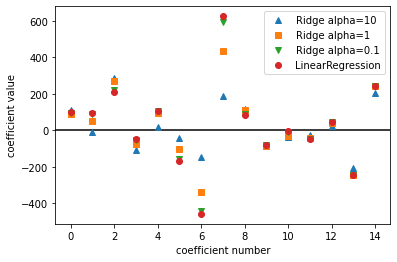

In [83]:
import matplotlib.pyplot as plt
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("coefficient number")
plt.ylabel("coefficient value")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend()
plt.show()

### 그리드 서치 적용

In [91]:
param_grid ={'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [92]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = X_train_trans, X_test_trans, y_train, y_test

grid = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_trans, y_train)
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적 매개변수:", grid.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid.best_score_))

테스트 세트 점수: 0.89
최적 매개변수: {'alpha': 10}
최고 교차 검증 점수: 0.81


## 라소회귀 적용

In [94]:
# 범주형 인코딩&실수형 스탠다드 스케일링 결과 바탕으로 라소회귀 적용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# target인 펭귄 몸무게(Body Mass (g))를 제외한 모든 열을 추출합니다
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    ndata_features, ndata['Body Mass (g)'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(81, 15)


In [95]:
# 범주형 인코딩&실수형 스탠다드스케일링을 거친 라소회귀 정확도
lasso = Lasso()
lasso.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train_trans, y_train)))
print("테스트 점수: {:.2f}".format(lasso.score(X_test_trans, y_test)))

훈련 세트 점수: 0.88
테스트 점수: 0.85


### 그리드 서치 적용

In [96]:
param_grid ={'alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [98]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = X_train_trans, X_test_trans, y_train, y_test

grid = GridSearchCV(Lasso(max_iter=50000), param_grid, cv=5, return_train_score=True)
grid.fit(X_train_trans, y_train)
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적 매개변수:", grid.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid.best_score_))

테스트 세트 점수: 0.88
최적 매개변수: {'alpha': 10}
최고 교차 검증 점수: 0.81


## RMSE 구하기

- 현재 가장 예측력이 좋은 것은 테스트 세트 점수 0.89인 alpha = 10 리지회귀

In [101]:
# 범주형 인코딩&실수형 스탠다드 스케일링 결과 바탕으로 리지회귀 적용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# target인 펭귄 몸무게(Body Mass (g))를 제외한 모든 열을 추출합니다
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    ndata_features, ndata['Body Mass (g)'], random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(81, 15)


In [102]:
ridge10 = Ridge(alpha=10).fit(X_train_trans, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train_trans, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test_trans, y_test)))

훈련 세트 점수: 0.86
테스트 세트 점수: 0.89


In [107]:
import numpy as np

def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true-pred)))
    return score

y_pred = ridge10.predict(X_test_trans)
print(RMSE(y_test, y_pred))

248.39342902470923


- 수치로는 현재 1등이나, 이는 결측치를 제거한 자료를 train_test split했기 때문으로 추정됨
- 유리한 자료만을 사용한 것.
- 중요한 건 테스트용 자료에 적용시의 결과

In [109]:
# 테스트 데이터 불러오기
test_data = pd.read_csv('/content/test.csv')

In [120]:
test_data

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...,...
223,223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


In [132]:
test_data = test_data.iloc[:,1:]

In [133]:
test_data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...
223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


- 우리가 학습시킨 모델을 테스트 데이터에 적용시킨 결과 받기

In [134]:
# train 데이터 전체로 훈련하기
ndata_features = ndata.drop("Body Mass (g)", axis=1)

# 데이터프레임과 Body Mass (g)을 분할합니다
X_train, y_train = ndata_features, ndata['Body Mass (g)']

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

# 자료가 늘어나서 109행

(109, 15)


In [144]:
ridge10 = Ridge(alpha=10).fit(X_train_trans, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train_trans, y_train)))

훈련 세트 점수: 0.86


## 테스트 데이터에서 결측치 채우기

## 결과 csv 뽑기

In [124]:
# 테스트 데이터를 기존에 피팅한 ct에 돌리기 (범주형 인코딩&스탠다드스케일링)
test_data_trans = ct.transform(ntest)

In [126]:
# 최종 결과
result = ridge10.predict(test_data_trans)

In [127]:
df_result = pd.DataFrame(result)
df_result

,0
0,4377.389821
1,5591.688820
2,3621.741417
3,3452.738139
4,3406.661267
...,...
223,4098.673901
224,4744.142834
225,4717.208977
226,4102.321326


In [130]:
# 결과를 csv로 저장하기
df_result.to_csv('sample.csv', index=True)